<div align="center"><font size=20>Clustering</font></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Old-Faithful-Dataset" data-toc-modified-id="Old-Faithful-Dataset-1">Old Faithful Dataset</a></span></li><li><span><a href="#Pandas.DataFrame" data-toc-modified-id="Pandas.DataFrame-2">Pandas.DataFrame</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-3">K-Means</a></span></li><li><span><a href="#K-Means-on-Old-Faithful-Data" data-toc-modified-id="K-Means-on-Old-Faithful-Data-4">K-Means on Old Faithful Data</a></span></li></ul></div>

Recall that for *unsupervised learning*, we have a bunch of samples and we want to identify regularities in the data.  For example, we may want to see if the data samples appear in separate blobs, or clusters.  If they do, then perhaps we can learn a lot about the data by studying which samples appear in which clusters.

Here we will develop an implementation of the [k-means clustering](https://en.wikipedia.org/wiki/K-means_clustering) algorithm.

But first, let's download, read in, and look at some interesting data!

# Old Faithful Dataset


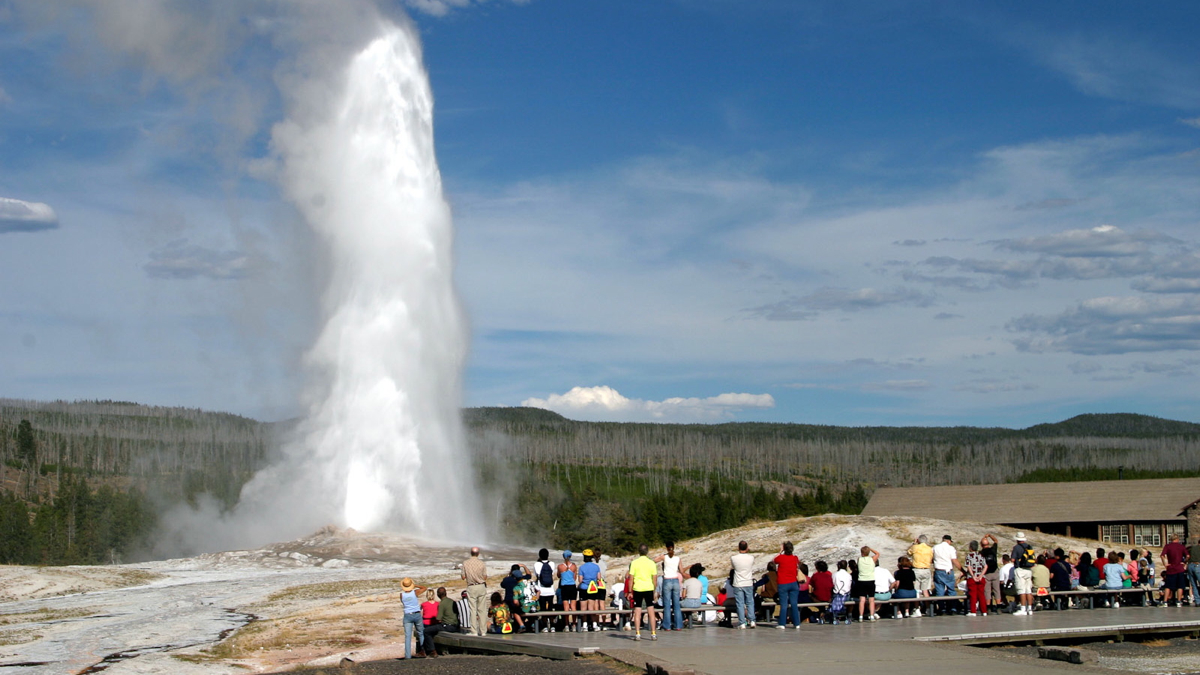

For example, take a look at this data set of eruption durations and the waiting times in between [eruptions of the Old Faithful Geyser](https://www.kaggle.com/janithwanni/old-faithful) in Yellowstone National Park.  You can download this data from the Kaggle site, but first you will have to register there, for no cost. After clicking on the "Download" button, you will have a file named `archive.zip`.  Go to the folder where `archive.zip` was downloaded and unzip it.  This should extract one file named `faithful.csv`.  Move this file into the folder in which you are running `jupyter notebook`.

Here is what the first 20 lines of the file look like.


In [ ]:
!head -20 faithful.csv

# Pandas.DataFrame

We need to read this data in to our python session.  There are several ways to do this.  A common way is to use the `pandas` package.  You can find lots of tutorials on using `pandas`.  A `pandas.Dataframe` is a lot like a `numpy.array` with additional capablities.  For one thing, it can maintain column names.  Looking at the contents of the data file, we notice the data file contains

* a heading line of column names,
* samples in rows, 
* each row starts with an index number, and
* values are separated by commas.

That's all we need to know to read this file!

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [8]:
# pd.read_csv?

In [9]:
pd.read_csv('faithful.csv')

,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85
...,...,...,...
267,268,4.117,81
268,269,2.150,46
269,270,4.417,90
270,271,1.817,46


Let's ignore that index column.  We can do that by asking `pandas` to only read in the second and third columns, indices 1 and 2. And we can practice specifying the delimiter, although we don't have to because the default delimiter is a comma.

In [10]:
datadf = pd.read_csv('faithful.csv', delimiter=',', usecols=(1, 2))
datadf

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


Isn't that a pretty, nicely-formatted table, rendered for us by jupyter in html?

In [11]:
type(datadf)

pandas.core.frame.DataFrame

In [12]:
datadf.columns

Index(['eruptions', 'waiting'], dtype='object')

I don't like these names.  Let's change them to 'duration' and 'interval'.

In [13]:
datadf.columns = ('duration', 'interval')

In [14]:
datadf

,duration,interval
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


It is easy to get the data values out of this `Dataframe` as a `numpy.array`, which is what we want so can use all of our handy `numpy` tools!

In [15]:
data = datadf.values
data

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ],
       [ 2.883, 55.   ],
       [ 4.7  , 88.   ],
       [ 3.6  , 85.   ],
       [ 1.95 , 51.   ],
       [ 4.35 , 85.   ],
       [ 1.833, 54.   ],
       [ 3.917, 84.   ],
       [ 4.2  , 78.   ],
       [ 1.75 , 47.   ],
       [ 4.7  , 83.   ],
       [ 2.167, 52.   ],
       [ 1.75 , 62.   ],
       [ 4.8  , 84.   ],
       [ 1.6  , 52.   ],
       [ 4.25 , 79.   ],
       [ 1.8  , 51.   ],
       [ 1.75 , 47.   ],
       [ 3.45 , 78.   ],
       [ 3.067, 69.   ],
       [ 4.533, 74.   ],
       [ 3.6  , 83.   ],
       [ 1.967, 55.   ],
       [ 4.083, 76.   ],
       [ 3.85 , 78.   ],
       [ 4.433, 79.   ],
       [ 4.3  , 73.   ],
       [ 4.467, 77.   ],
       [ 3.367, 66.   ],
       [ 4.033, 80.   ],
       [ 3.833, 74.   ],
       [ 2.017, 52.   ],
       [ 1.867, 48.   ],
       [ 4.833, 80.   ],
       [ 1.833, 59.   ],
       [ 4.783, 90.   ],


In [ ]:
data.shape

Okay, we have the data.  The second step is to get a feel for the data using graphics.  Let's just plot the data, with the first column, "eruptions", on the x axis and the second column, "duration", on the y axis.

In [ ]:
plt.plot(data[:, 0], data[:, 1], '.')
plt.xlabel('duration')
plt.ylabel('interval')

We can clearly see two clusters here.  For higher dimensional data, we cannot directly visualize the data to see the clusters.  We need a mathematical way to detect clusters. This gives rise to the class of unsupervised learning methods called *clustering* algorithms.

# K-Means

A simple example of a clustering algorithm is the *k-means* algorithm.  It results in identifying $k$ cluster centers.  It is an iterative algorithm that starts with an initial assignment of $k$ centers.  Then it proceeds by determining which centers each data sample is closest to and adjusts the centers to be the means of each of these data partitions.  It then repeats.

Let's develop this algorithm one step at a time.

Each sample in the Old Faithful data has two attributes, so each sample is in two-dimensional space.  We know by looking at the above plot that our data nicely falls in two clusters, so we will start with $k=2$.  We will initialize the two cluster centers by randomly choosing two of the data samples.

In [16]:
data[:5, :]

array([[ 3.6  , 79.   ],
       [ 1.8  , 54.   ],
       [ 3.333, 74.   ],
       [ 2.283, 62.   ],
       [ 4.533, 85.   ]])

In [17]:
data[[0, 4], :]

array([[ 3.6  , 79.   ],
       [ 4.533, 85.   ]])

In [18]:
n_samples = data.shape[0]
np.random.choice(range(n_samples), 2, replace=False)

array([219,  14])

In [19]:
centers = data[np.random.choice(range(n_samples), 2, replace=False), :]
centers

array([[ 4.55 , 79.   ],
       [ 4.233, 76.   ]])

Now we must find all samples that are closest to the first center, and those that are closest to the second sample. First, let's practice with calculating distances between two points represented as two `numpy` vectors.  That distance is the square root of the sum of the squared component-wise differences.  
(image from [source](https://en.neurochispas.com/geometry/distance-between-two-points-formula-and-examples/))

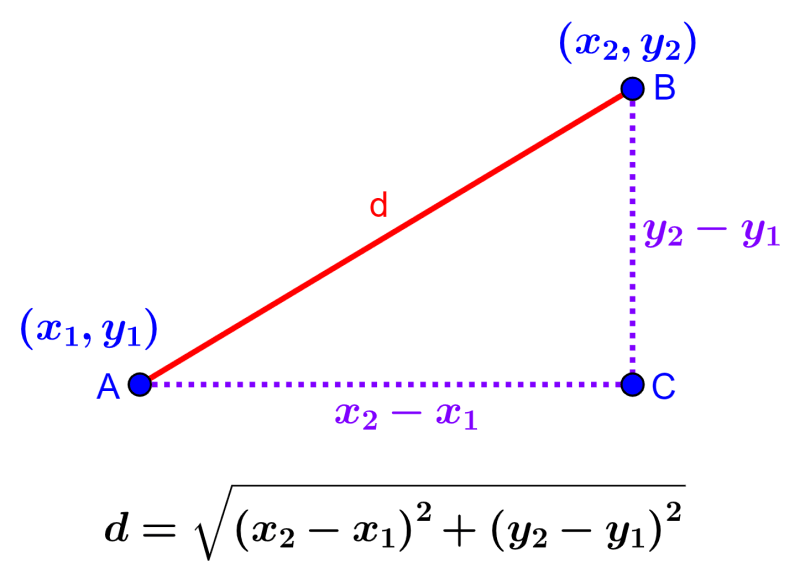


In [20]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
a, b

(array([1, 2, 3]), array([10, 20, 30]))

In [21]:
a - b

array([ -9, -18, -27])

In [22]:
(a - b) ** 2

array([ 81, 324, 729])

In [23]:
np.sum((a - b) ** 2)

1134

In [24]:
np.sqrt(np.sum((a - b) ** 2))

33.67491648096547

That works. Now to calculate the difference between a cluster center and all of the samples, we can write a for loop, right?

WRONG!  Well....yes, but we don't have to if we have the power of `numpy` at our disposal.

Imagine that `a` is a cluster center and `b` contains data samples, one per row.  The first step of calculating the distance from `a` to all samples in `b` is to subtract them component-wise.

In [25]:
a = np.array([1, 2, 3])
b = np.array([[10, 20, 30], [40, 50, 60]])
print(a)
print(b)

[1 2 3]
[[10 20 30]
 [40 50 60]]


In [26]:
b - a

array([[ 9, 18, 27],
       [39, 48, 57]])

Nice. The single row vector `a` is duplicated for as many rows as there are in `b`!  We can use this to calculate the squared distance between a center and every sample. 

Why do you suppose we are calculating the squared distance and not the actual distance?

In [27]:
centers[0, :]

array([ 4.55, 79.  ])

In [28]:
np.set_printoptions(precision=2)

sqdists_to_center_0 = np.sum((centers[0, :] - data) ** 2, axis=1)
sqdists_to_center_0

array([9.02e-01, 6.33e+02, 2.65e+01, 2.94e+02, 3.60e+01, 5.79e+02,
       8.10e+01, 3.69e+01, 7.91e+02, 3.60e+01, 6.32e+02, 2.54e+01,
       1.12e+00, 1.03e+03, 1.60e+01, 7.35e+02, 2.97e+02, 2.51e+01,
       7.38e+02, 9.00e-02, 7.92e+02, 1.03e+03, 2.21e+00, 1.02e+02,
       2.50e+01, 1.69e+01, 5.83e+02, 9.22e+00, 1.49e+00, 1.37e-02,
       3.61e+01, 4.01e+00, 1.70e+02, 1.27e+00, 2.55e+01, 7.35e+02,
       9.68e+02, 1.08e+00, 4.07e+02, 1.21e+02, 1.04e+00, 4.48e+02,
       2.50e+01, 4.49e+02, 3.60e+01, 1.75e+01, 2.26e+02, 6.82e+02,
       9.01e+00, 4.07e+02, 1.61e+01, 1.21e+02, 6.32e+02, 1.08e+00,
       6.33e+02, 1.61e+01, 6.47e+01, 2.33e+02, 4.00e+00, 4.05e+00,
       4.05e+02, 2.50e+01, 9.69e+02, 9.06e+00, 3.68e+02, 1.69e+02,
       1.15e+00, 1.02e+00, 2.02e+02, 3.60e+01, 9.27e+00, 5.36e+02,
       2.50e-03, 6.43e+01, 2.96e+02, 9.27e+00, 3.67e+02, 1.00e+00,
       9.44e+00, 1.69e+01, 1.62e+01, 9.05e+00, 8.12e+01, 2.00e+02,
       3.62e+01, 8.11e+01, 9.36e+00, 1.00e+00, 9.67e+02, 4.93e

In [29]:
sqdists_to_center_1 = np.sum((centers[1, :] - data) ** 2, axis=1)
sqdists_to_center_1

array([9.40e+00, 4.90e+02, 4.81e+00, 2.00e+02, 8.11e+01, 4.43e+02,
       1.44e+02, 8.14e+01, 6.30e+02, 8.10e+01, 4.90e+02, 6.41e+01,
       4.00e+00, 8.47e+02, 4.92e+01, 5.80e+02, 2.02e+02, 6.43e+01,
       5.83e+02, 9.00e+00, 6.31e+02, 8.47e+02, 4.61e+00, 5.04e+01,
       4.09e+00, 4.94e+01, 4.46e+02, 2.25e-02, 4.15e+00, 9.04e+00,
       9.00e+00, 1.05e+00, 1.01e+02, 1.60e+01, 4.16e+00, 5.81e+02,
       7.90e+02, 1.64e+01, 2.95e+02, 1.96e+02, 1.60e+01, 3.30e+02,
       6.41e+01, 3.30e+02, 9.09e+00, 4.98e+01, 1.44e+02, 5.34e+02,
       3.62e+01, 2.94e+02, 1.32e+00, 1.96e+02, 4.90e+02, 1.64e+01,
       4.90e+02, 4.94e+01, 2.53e+01, 1.51e+02, 1.11e+00, 2.50e+01,
       2.93e+02, 6.41e+01, 7.90e+02, 3.63e+01, 2.62e+02, 2.56e+02,
       4.00e+00, 4.22e+00, 1.26e+02, 9.22e+00, 3.60e+01, 4.05e+02,
       9.07e+00, 2.51e+01, 2.01e+02, 6.96e-01, 2.61e+02, 4.11e+00,
       1.22e-01, 4.94e+01, 1.01e+00, 3.60e+01, 3.60e+01, 1.24e+02,
       9.03e+00, 1.44e+02, 8.01e-02, 1.61e+01, 7.88e+02, 1.00e

And, which samples are closest to the first center?

In [30]:
sqdists_to_center_0 < sqdists_to_center_1

array([ True, False, False, False,  True, False,  True,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False, False, False,  True, False,  True, False,
        True, False,  True,  True,  True, False, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True, False, False, False,  True, False,  True, False,  True,
       False,  True, False,  True, False, False,  True, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True,  True, False, False,  True,  True, False,  True, False,
        True, False,  True, False, False, False, False,  True,  True,
       False,  True,

This approach is easy for $k=2$, but what if $k$ is larger.  Can we calculate all of the needed distances in one `numpy` expression?  I bet we can!

Let's play a bit with this using strings, to clearly show the results of a `+` operation.

In [31]:
c = np.array([['c1x', 'c1y'],
              ['c2x', 'c2y']])
c

array([['c1x', 'c1y'],
       ['c2x', 'c2y']], dtype='<U3')

In [32]:
c = np.array([[1, 2],
              [5, 6]])
c

array([[1, 2],
       [5, 6]])

In [33]:
d = np.array([[1, 2],
              [5, 6],
              [10, 11]])
d

array([[ 1,  2],
       [ 5,  6],
       [10, 11]])

In [34]:
c - d

ValueError: operands could not be broadcast together with shapes (2,2) (3,2) 

Well, let's try to do this with for loops first.

In [35]:
c.shape, d.shape

((2, 2), (3, 2))

In [36]:
differences = np.empty((2, 3, 2)) 

In [37]:
c, d

(array([[1, 2],
        [5, 6]]),
 array([[ 1,  2],
        [ 5,  6],
        [10, 11]]))

In [38]:
for ci in range(2):
    for di in range(3):
        for xyi in range(2):
            differences[ci, di, xyi] = c[ci, xyi] - d[di, xyi]
differences

array([[[ 0.,  0.],
        [-4., -4.],
        [-9., -9.]],

       [[ 4.,  4.],
        [ 0.,  0.],
        [-5., -5.]]])

Okay.  Maybe you are happy with this.  But you won't be if we have 100 centers (rows of c) and 10,000 samples (rows of d), and 1,000 dimensional samples (columns of c and d).  For such cases we need to do away with these for loops!

Now here comes some weird `numpy` magic.  `c` is shape (2, 2) and `d` is shape (3, 2). We want to duplicate each row in `c` three times so it can be subtracted from each row in `d`.  `numpy`'s broadcasting will do this if we "stretch" `c` by adding a middle dimension, over which `numpy` will duplicate values, and stretch `d` by adding first dimension.  This trickness is illustrated in the [numpy documentation](https://numpy.org/doc/stable/user/basics.broadcasting.html).

In [39]:
c.shape, d.shape

((2, 2), (3, 2))

In [40]:
c[:, np.newaxis, :].shape, d[np.newaxis, :, :].shape

((2, 1, 2), (1, 3, 2))

In [41]:
c, d

(array([[1, 2],
        [5, 6]]),
 array([[ 1,  2],
        [ 5,  6],
        [10, 11]]))

In [42]:
c[:, np.newaxis, :] - d[np.newaxis, :, :]

array([[[ 0,  0],
        [-4, -4],
        [-9, -9]],

       [[ 4,  4],
        [ 0,  0],
        [-5, -5]]])

Since `numpy` can do broadcasting, we don't need to stretch the `d`.

In [43]:
c[:, np.newaxis, :] - d

array([[[ 0,  0],
        [-4, -4],
        [-9, -9]],

       [[ 4,  4],
        [ 0,  0],
        [-5, -5]]])

Now, back to working with `centers` and `data`.

In [44]:
centers[:, np.newaxis, :].shape, data.shape

((2, 1, 2), (272, 2))

In [45]:
differences = centers[:, np.newaxis, :] - data
differences

array([[[  0.95,   0.  ],
        [  2.75,  25.  ],
        [  1.22,   5.  ],
        ...,
        [  0.13, -11.  ],
        [  2.73,  33.  ],
        [  0.08,   5.  ]],

       [[  0.63,  -3.  ],
        [  2.43,  22.  ],
        [  0.9 ,   2.  ],
        ...,
        [ -0.18, -14.  ],
        [  2.42,  30.  ],
        [ -0.23,   2.  ]]])

This shape is the (number of centers X number of data samples X number of components in each sample).

In [46]:
differences.shape

(2, 272, 2)

So now we have to square these and sum over the last dimension, the x and y squared differences.

In [47]:
squared_distances = np.sum(differences ** 2, axis=2)  # axis=2 is the third dimension
squared_distances.shape

(2, 272)

These are the square distances between each of our two centers and each of the 272 samples.  If we take the `argmin` across the two rows, we will have the index of the closest center for each of the 272 samples.

In [48]:
clusters = np.argmin(squared_distances, axis=0)
clusters

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1])

Now, to calculate the new values of our two centers, we just calculate the mean of the appropriate samples.

In [49]:
data[clusters == 0, :].shape

(117, 2)

In [50]:
data[clusters == 0, :].mean(axis=0)

array([ 4.35, 83.19])

In [51]:
data[clusters == 1, :].mean(axis=0)

array([ 2.84, 61.62])

We can do both in a for loop and update the values stored in `centers`.

In [52]:
k = 2
for i in range(k):
    centers[i, :] = data[clusters == i, :].mean(axis=0)

In [53]:
centers

array([[ 4.35, 83.19],
       [ 2.84, 61.62]])

Now, we can wrap these steps in our first version of a `kmeans` function.

In [54]:
def kmeans(data, k = 2, n_iterations = 5):
    
    # Initial centers
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]
    
    # Repeat n times
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
        closest = np.argmin(squared_distances, axis=0)
        
        # Update cluster centers
        for i in range(k):
            centers[i, :] = data[closest == i, :].mean(axis=0)
            
    return centers

In [55]:
kmeans(data, 2)

array([[ 4.3 , 80.28],
       [ 2.09, 54.75]])

In [56]:
kmeans(data, 2)

array([[ 2.09, 54.75],
       [ 4.3 , 80.28]])

We need a measure of the quality of our clustering.  For this, we define $J$, which is a performance measure being minimized by *k-means*. It is defined as
$$
J = \sum_{n=1}^N \sum_{k=1}^K r_{nk} ||\mathbf{x}_n - \mathbf{c}_k||^2
$$
where $N$ is the number of samples, $K$ is the number of cluster centers, $\mathbf{x}_n$ is the $n^{th}$ sample and $\mathbf{c}_k$ is the $k^{th}$ center, each being an element of $\mathbf{R}^p$ where $p$ is the dimensionality of the data. $r_{nk}$ is 1 if $\mathbf{x}_n$ is closest to center $\mathbf{c}_k$, and 0 otherwise.

The sums can be computed using python *for* loops, but no, no, let's do the matrix magic. We already know how to calculate the difference between all samples and all centers.

In [57]:
squared_distances = np.sum((centers[:,np.newaxis,:] - data)**2, axis=2)
squared_distances.shape

(2, 272)

The calculation of $J$ requires us to multiply the squared differences of the each component by $r_{nk}$. Since we already have all of the squared distances, let's just sum up the minimum distances for each sample. 

In [58]:
np.min(squared_distances, axis=0)

array([1.81e+01, 5.91e+01, 8.55e+01, 4.52e-01, 3.32e+00, 4.38e+01,
       2.33e+01, 3.85e+00, 1.14e+02, 3.28e+00, 5.91e+01, 8.47e-01,
       2.69e+01, 2.15e+02, 1.58e-01, 9.30e+01, 1.33e+00, 8.62e-01,
       9.41e+01, 1.75e+01, 1.14e+02, 2.15e+02, 2.77e+01, 5.45e+01,
       8.45e+01, 5.98e-01, 4.46e+01, 5.17e+01, 2.72e+01, 1.75e+01,
       1.04e+02, 3.83e+01, 1.95e+01, 1.03e+01, 8.47e+01, 9.32e+01,
       1.86e+02, 1.04e+01, 7.87e+00, 4.66e+01, 1.02e+01, 1.40e+01,
       7.06e-01, 1.43e+01, 1.04e+02, 1.10e+00, 6.66e+00, 7.48e+01,
       1.49e+00, 7.56e+00, 6.72e+01, 4.65e+01, 5.91e+01, 1.04e+01,
       5.93e+01, 3.19e-01, 8.88e+01, 7.04e+00, 3.83e+01, 4.79e+00,
       7.23e+00, 6.82e-01, 1.87e+02, 1.61e+00, 3.66e+00, 7.77e+01,
       2.69e+01, 2.70e+01, 1.20e+01, 1.04e+02, 1.51e+00, 3.23e+01,
       1.76e+01, 8.93e+01, 8.74e-01, 5.22e+01, 3.29e+00, 2.70e+01,
       5.19e+01, 5.98e-01, 6.71e+01, 1.41e+00, 7.18e+01, 1.15e+01,
       1.04e+02, 2.35e+01, 5.18e+01, 1.02e+01, 1.86e+02, 8.03e

In [59]:
np.sum(np.min(squared_distances, axis=0))

13912.561322716638

Let's define a function named `calc_J` to do this calculation.

In [60]:
def calc_J(data, centers):
    squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    return np.sum(np.min(squared_distances, axis=0))

In [61]:
calc_J(data, centers)

13912.561322716638

Oh, but wait.  We probably already have the squared distances calculated in the k-means algorithm.  Let's just pass them in.

In [62]:
def calc_J(squared_distances):
    # squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    return np.sum(np.min(squared_distances, axis=0))

Now we can add this calculation to track the value of $J$ for each iteration as a kind of learning curve.  $J$ measures the average "spread" within each cluster, so the smaller it is, the better.

In [63]:
def kmeans(data, k, n_iterations):
    
    # Initialize centers and list J to track performance metric
    centers = data[np.random.choice(range(data.shape[0]), k, replace=False), :]
    J = []
    
    for iteration in range(n_iterations):
        
        # Which center is each sample closest to?
        squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
        closest = np.argmin(squared_distances, axis=0)
        
        # Calculate J and append to list J
        J.append(calc_J(squared_distances))
        
        # Update cluster centers
        for i in range(k):
            centers[i, :] = data[closest == i, :].mean(axis=0)
            
    # Calculate J one final time and return results
    squared_distances = np.sum((centers[:, np.newaxis, :] - data)**2, axis=2)
    J.append(calc_J(squared_distances))
    
    return centers, J, closest

# K-Means on Old Faithful Data

In [64]:
centers, J, closest = kmeans(data, 2, 10)
centers

array([[ 2.09, 54.75],
       [ 4.3 , 80.28]])

In [65]:
J

[56845.44334,
 16454.47094314515,
 9792.416798094238,
 8925.715281184834,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721,
 8901.76872094721]

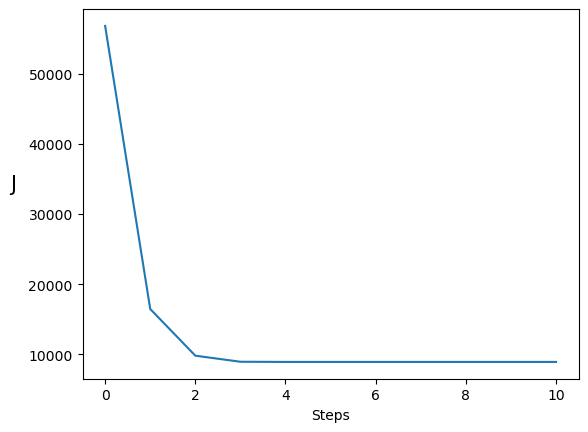

In [66]:
plt.plot(J)
plt.xlabel('Steps')
plt.ylabel('J   ', rotation=0, fontsize=15);

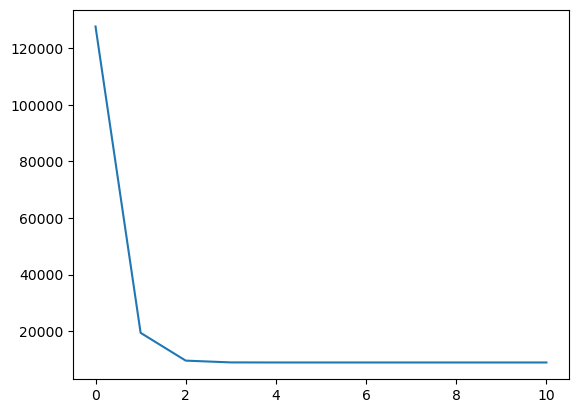

In [67]:
centers, J, closest = kmeans(data, 2, 10)
plt.plot(J);

In [68]:
centers

array([[ 4.3 , 80.28],
       [ 2.09, 54.75]])

In [69]:
closest

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

array([[ 2.09, 54.75],
       [ 4.3 , 80.28]])

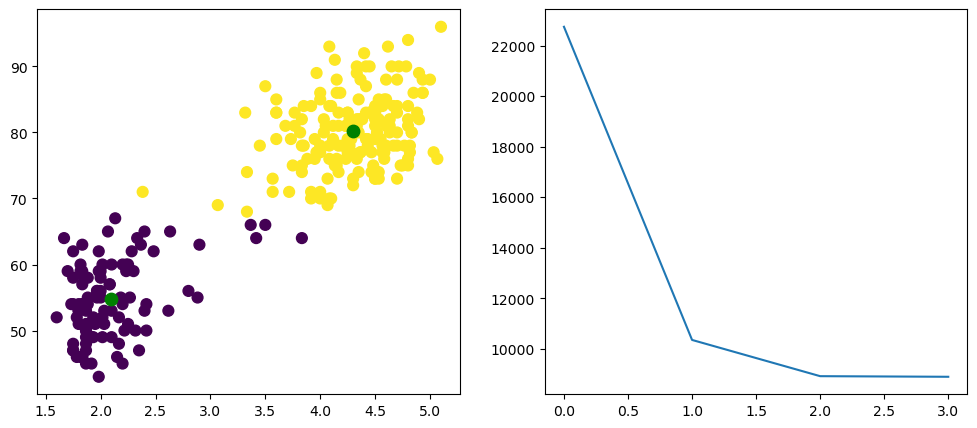

In [70]:
centers, J, closest = kmeans(data, 2, 3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], s=60, c=closest)
plt.scatter(centers[:, 0], centers[:, 1], s=80, c="green")

plt.subplot(1, 2, 2)
plt.plot(J)

centers

`plt.scatter` scales the values given to the `c=` argument.  If we just want to pick the colors from the default colormap, we should call `plt.scatter` once for each cluster.

array([[ 2.07, 54.39],
       [ 4.28, 80.05]])

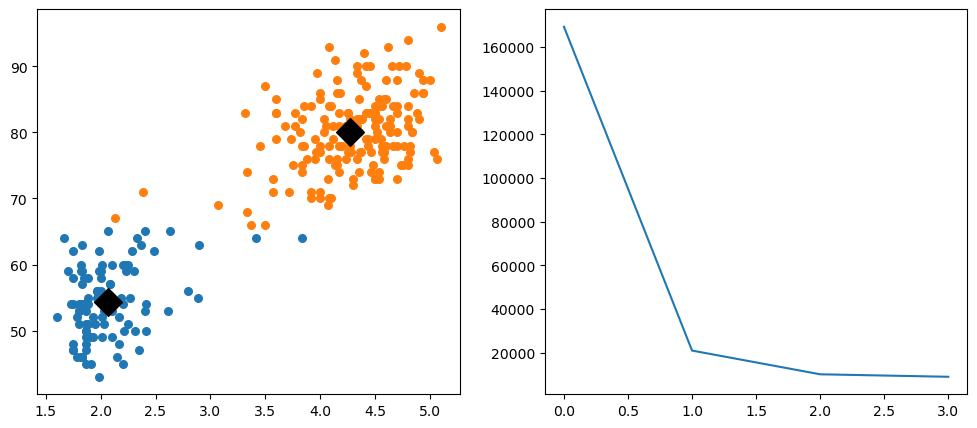

In [71]:
centers, J, closest = kmeans(data, 2, 3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)

for cluster in np.unique(closest):
    members = closest == cluster
    plt.scatter(data[members, 0], data[members, 1], s=30)
    
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="black", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

Let's try for more iterations.

array([[ 4.3 , 80.28],
       [ 2.09, 54.75]])

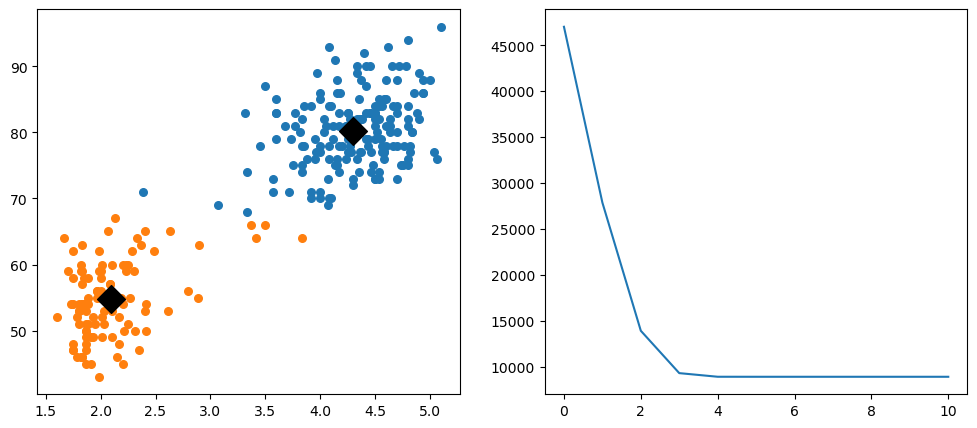

In [72]:
centers, J, closest = kmeans(data, 2, 10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for cluster in np.unique(closest):
    members = closest == cluster
    plt.scatter(data[members, 0], data[members, 1], s=30)
    
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="black", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

Now, how about three centers, so $k=3$?

array([[ 4.37, 84.92],
       [ 2.07, 54.39],
       [ 4.19, 75.55]])

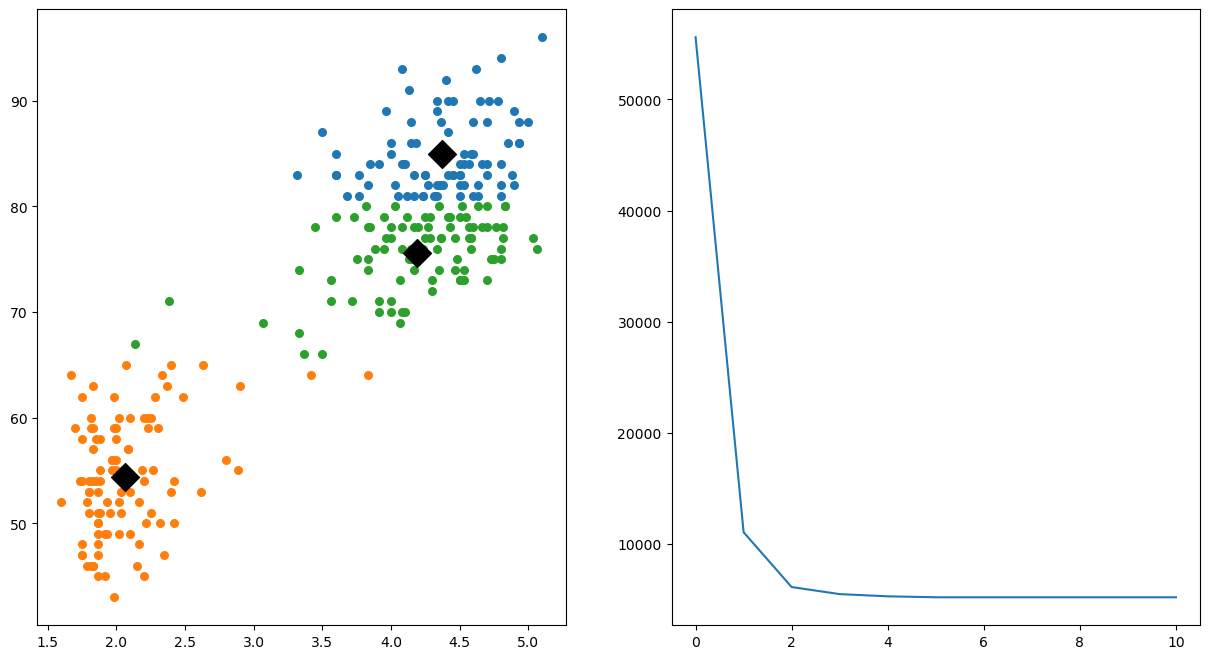

In [73]:
centers, J, closest = kmeans(data, 3, 10)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
for cluster in np.unique(closest):
    members = closest == cluster
    plt.scatter(data[members, 0], data[members, 1], s=30)
    
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="black", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

array([[ 4.46, 88.4 ],
       [ 3.4 , 68.72],
       [ 4.32, 79.7 ],
       [ 2.01, 52.87]])

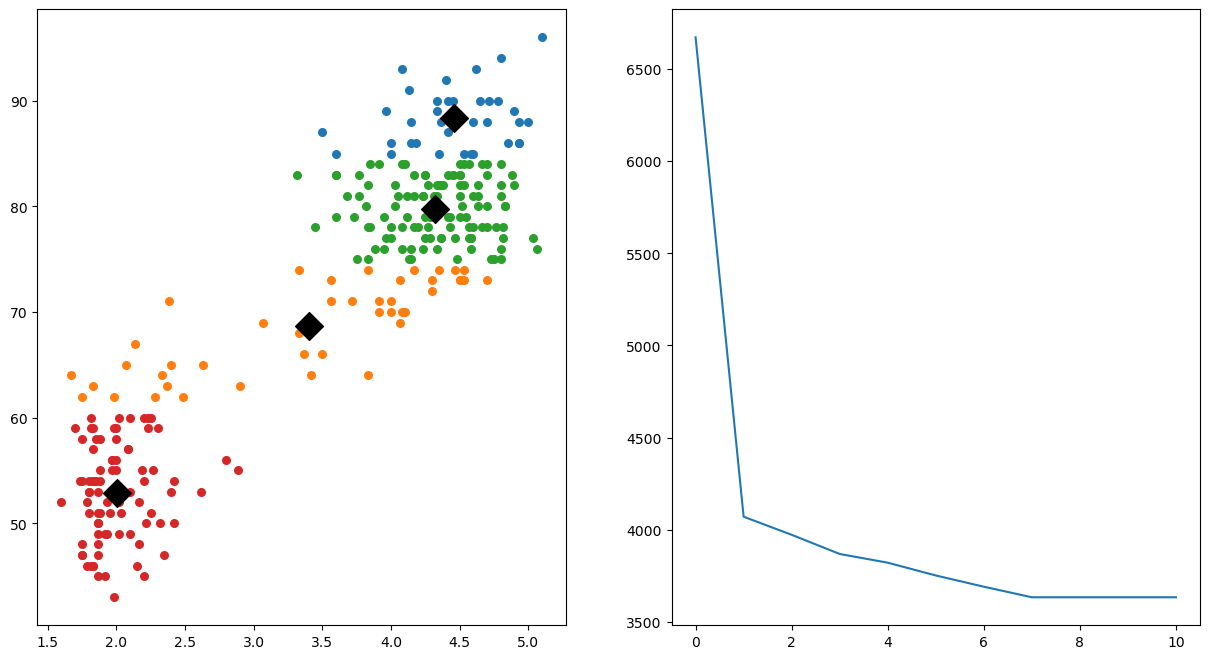

In [74]:
centers, J, closest = kmeans(data, 4, 10)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
for cluster in np.unique(closest):
    members = closest == cluster
    plt.scatter(data[members, 0], data[members, 1], s=30)
    
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="black", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

Or six centers?

array([[ 2.29, 61.71],
       [ 2.  , 49.74],
       [ 2.04, 54.18],
       [ 4.24, 75.95],
       [ 4.37, 84.92],
       [ 1.93, 45.85]])

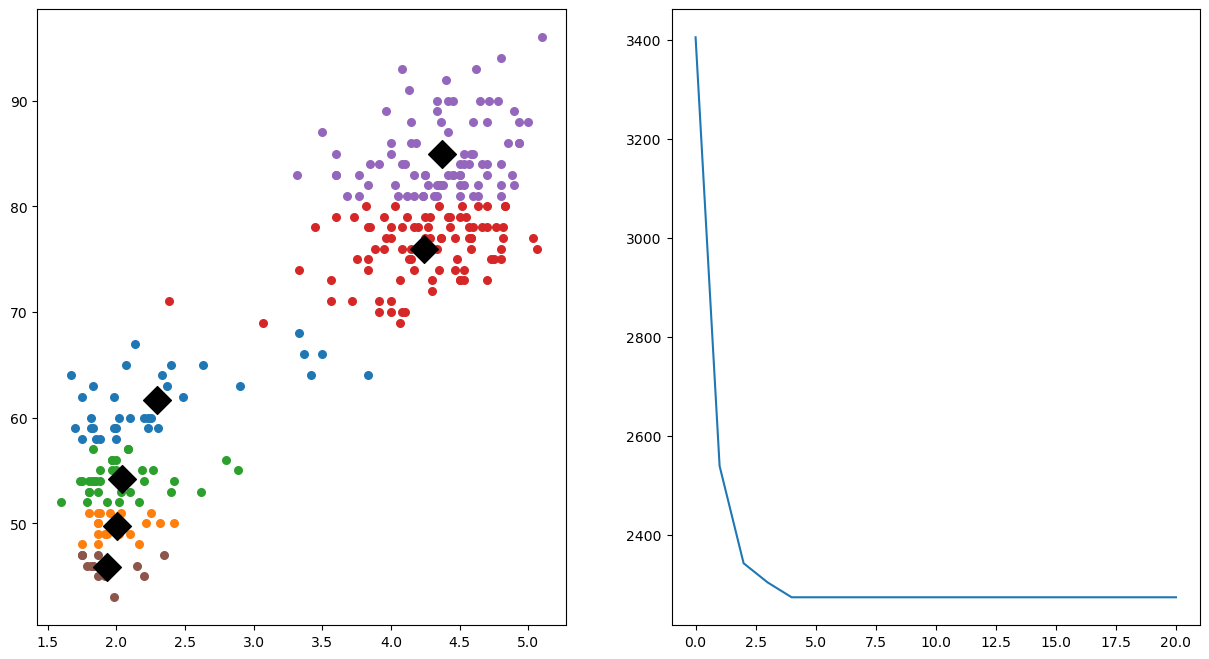

In [75]:
centers, J, closest = kmeans(data, 6, 20)

plt.figure(figsize=(15, 8))

plt.subplot(1, 2, 1)
for cluster in np.unique(closest):
    members = closest == cluster
    plt.scatter(data[members, 0], data[members, 1], s=30)
    
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="black", marker='D')

plt.subplot(1, 2, 2)
plt.plot(J)

centers

*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University. Authors include Asa Ben-Hur, Ross Beveridge, and Chuck Anderson.*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*